### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

### Load the Data

In [2]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

### Scale the data

In [3]:
x_train= x_train/255
x_test= x_test/255

### Build the Model

In [7]:
model=Sequential()

#First convolution layer
model.add(Conv2D(filters=32, input_shape=(28,28,1),kernel_size=(3,3),
                activation='relu'))

#First Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

#Second convolution layer
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu'))

#Second Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 256)              

In [9]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train, epochs=10, batch_size=10)

Epoch 1/10


6000/6000 [==============================] - 35s 5ms/step - loss: 0.1259 - accuracy: 0.9621
Epoch 2/10
6000/6000 [==============================] - 31s 5ms/step - loss: 0.0497 - accuracy: 0.9848
Epoch 3/10
6000/6000 [==============================] - 32s 5ms/step - loss: 0.0349 - accuracy: 0.9892
Epoch 4/10
6000/6000 [==============================] - 33s 5ms/step - loss: 0.0271 - accuracy: 0.9919
Epoch 5/10
6000/6000 [==============================] - 33s 5ms/step - loss: 0.0231 - accuracy: 0.9930
Epoch 6/10
6000/6000 [==============================] - 33s 5ms/step - loss: 0.0212 - accuracy: 0.9935
Epoch 7/10
6000/6000 [==============================] - 33s 5ms/step - loss: 0.0168 - accuracy: 0.9947
Epoch 8/10
6000/6000 [==============================] - 32s 5ms/step - loss: 0.0164 - accuracy: 0.9953
Epoch 9/10
6000/6000 [==============================] - 32s 5ms/step - loss: 0.0146 - accuracy: 0.9958
Epoch 10/10
6000/6000 [==============================] - 32s 5ms/step -

### Evaluate on test set

In [11]:
model.evaluate(x_test,y_test,batch_size=1)

10000/10000 [==============================] - 33s 3ms/step - loss: 0.0446 - accuracy: 0.9913


[0.0445721335709095, 0.9912999868392944]

### Predict on image

In [21]:
import cv2

img= cv2.imread('images/new_img.png',0)

In [22]:
img=cv2.resize(img,(28,28))

In [23]:
img.shape

(28, 28)

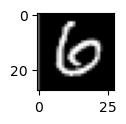

In [24]:
plt.figure(figsize=(1,1))
plt.imshow(img,cmap='gray')

In [25]:
img= img/255
img=img.reshape(1,28,28)

result=model.predict(img)

np.argmax(result)

1/1 [==============================] - 0s 107ms/step


6